In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.pyplot import figure
import matplotlib.colors
import time
from statistics import mean
from scipy.stats import norm
from scipy.optimize import minimize_scalar  

%matplotlib inline

In [46]:
def jump_process(seed = 0, T = 1, n = 100, S_0 = 100, alpha = 1, sigma = 0.5, lam = 1, mu = 0.8, delta = 0.5, paths = 10):
    np.random.seed(seed)
    dt = T/n
    k = np.exp(mu + delta**2 / 2 ) - 1

    size = (paths, n+1)
    
    S = np.zeros(size)
    
    Y = mu + delta * np.random.randn(size[0], size[1])

    N = np.random.rand(size[0], size[1])
    
    for j in range(paths):    
        for i in range(1, n+1):
            if N[j, i] <= lam * dt:
                N[j, i] = 1

            else:
                N[j, i] = 0

    W = sigma * np.sqrt(dt) * np.random.randn(size[0], size[1])
    

    
    D = (alpha - lam * k - sigma**2 /2) * dt * np.ones(size)

    
    S[:, 0] = S_0
    
    
    E = np.zeros(size)
    E = D + W + Y*N


    for i in range(1, n+1):
        S[:, i] = S[:, i-1] * np.exp(E[:, i])

    time = np.arange(0, T+dt, dt)
    
    for j in range(paths):
        
        plt.plot(time, S[j, :])
        plt.xlabel("Time")
        plt.ylabel("Asset Price")
        plt.title("Merton Model Dynamics")
        

    plt.savefig("Merton_Dynamics.png")

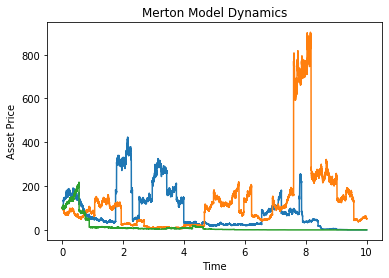

In [47]:
jump_process(T = 10, n = 100000, S_0 = 100, alpha = 1.2, sigma = 0.5, lam = 3, mu = 0, delta = 0.8, paths = 3)

In [9]:
N = norm.cdf

def BS_Call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_Put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [12]:
def Merton_Call(S, K, T, r, sigma, m , v, lam):
    p = 0
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_Call(S, K, T, r_k, sigma_k)
    
    return p 


def Merton_Put(S, K, T, r, sigma, m , v, lam):
    p = 0 # price of option
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k) # 
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) \
                    * BS_Put(S, K, T, r_k, sigma_k)
    return p 

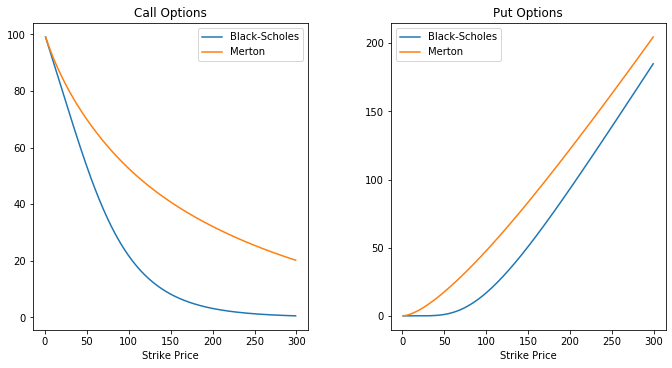

In [23]:
strike = np.arange(1,300, 1)

BS_CALLS = []
BS_PUTS = []
MERTON_CALLS = []
MERTON_PUTS = []

for x in strike:
    BS_CALLS.append(BS_Call(S=100, K=x, T=1, r=0.05, sigma=0.5))
    BS_PUTS.append(BS_Put(S=100, K=x, T=1, r=0.05, sigma=0.5))
    MERTON_CALLS.append(Merton_Call(S=100, K=x, T=1, r=0.05, sigma=0.5, m=0.3, v=0.2, lam=2))
    MERTON_PUTS.append(Merton_Put(S=100, K=x, T=1, r=0.05, sigma=0.5, m=0.3, v=0.2, lam=2))
    
fig, (ax1, ax2) = plt.subplots(1,2)

fig.tight_layout()
fig.set_size_inches(10, 5)
plt.subplots_adjust(wspace=0.3, hspace=0.25)

ax1.plot(strike, BS_CALLS, label="Black-Scholes")
ax1.plot(strike, MERTON_CALLS, label="Merton")
ax1.legend()
ax1.title.set_text("Call Options")
ax1.set_xlabel("Strike Price")

ax2.plot(strike, BS_PUTS, label="Black-Scholes")
ax2.plot(strike, MERTON_PUTS, label="Merton")
ax2.legend()
ax2.title.set_text("Put Options")
ax2.set_xlabel("Strike Price")

fig.savefig("M B-S.png", bbox_inches='tight')